# Importing the required libraries

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load the dataset

In [22]:
breast_cancer = load_breast_cancer()
X = pd.DataFrame(breast_cancer.data, columns = breast_cancer.feature_names)
y = pd.DataFrame(breast_cancer.target)

print("The dataset is loaded")

print(X.shape)
print("Target distribution:\n", y.value_counts(normalize=True))

The dataset is loaded
(569, 30)
Target distribution:
 0
1    0.627417
0    0.372583
Name: proportion, dtype: float64


# Splitting the Dataset

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2 , random_state = 42)

In [24]:
print("The Dataset is splitted among training set ( 80% ) and testing test ( 20% )")

The Dataset is splitted among training set ( 80% ) and testing test ( 20% )


# Exploratory Data Analysis

In [25]:
print(X.head())
print(X.describe)

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst radius  worst texture  worst perimeter  \
0           

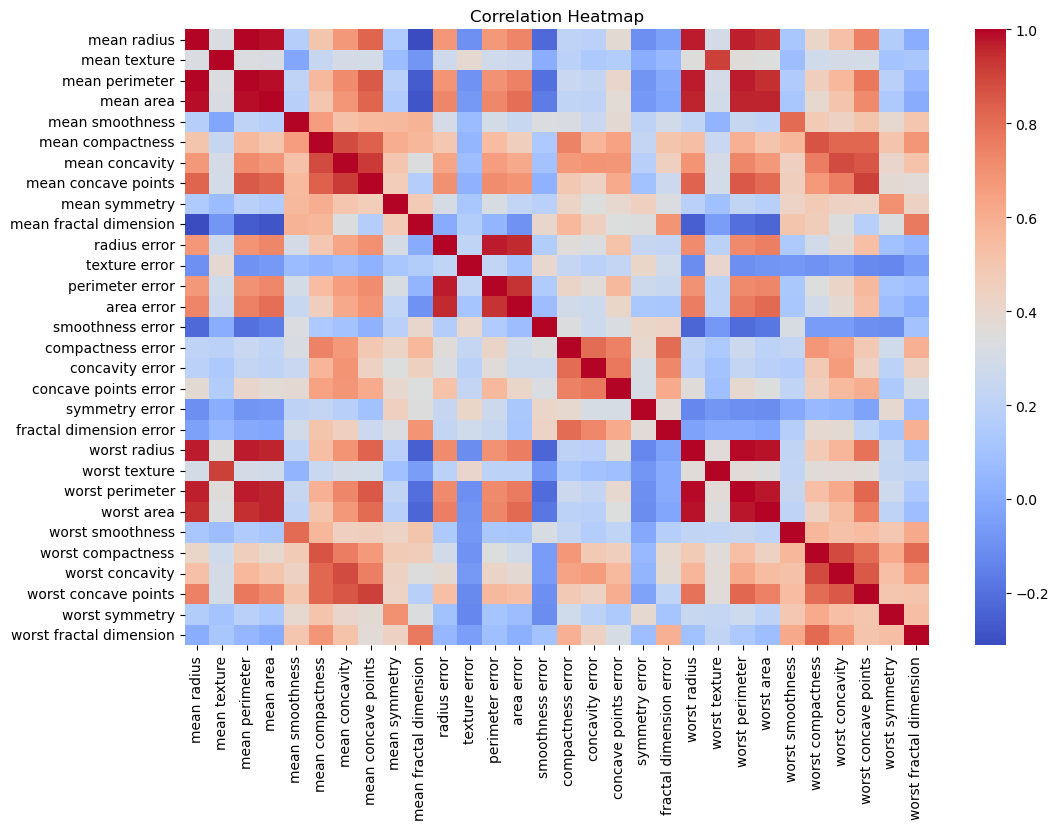

In [26]:
plt.figure(figsize=(12,8))
sns.heatmap(X.corr(), cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# Feature Scaling

In [35]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Training the Model

In [36]:
lr = LogisticRegression()
lr.fit(X_train_scaled, y_train)

pred = lr.predict(X_test_scaled)

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# Evaluate the Model

In [41]:
accuracy = accuracy_score(y_test, pred)
print(f"Accuracy of Logistic Regression: {accuracy:.4f}")

Accuracy of Logistic Regression: 0.9737


In [43]:
print("Classification Report of the Logistic Regression Model: \n", classification_report(y_test, pred, target_names=[str(i) for i in breast_cancer.target_names]))

Classification Report of the Logistic Regression Model: 
               precision    recall  f1-score   support

   malignant       0.98      0.95      0.96        43
      benign       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



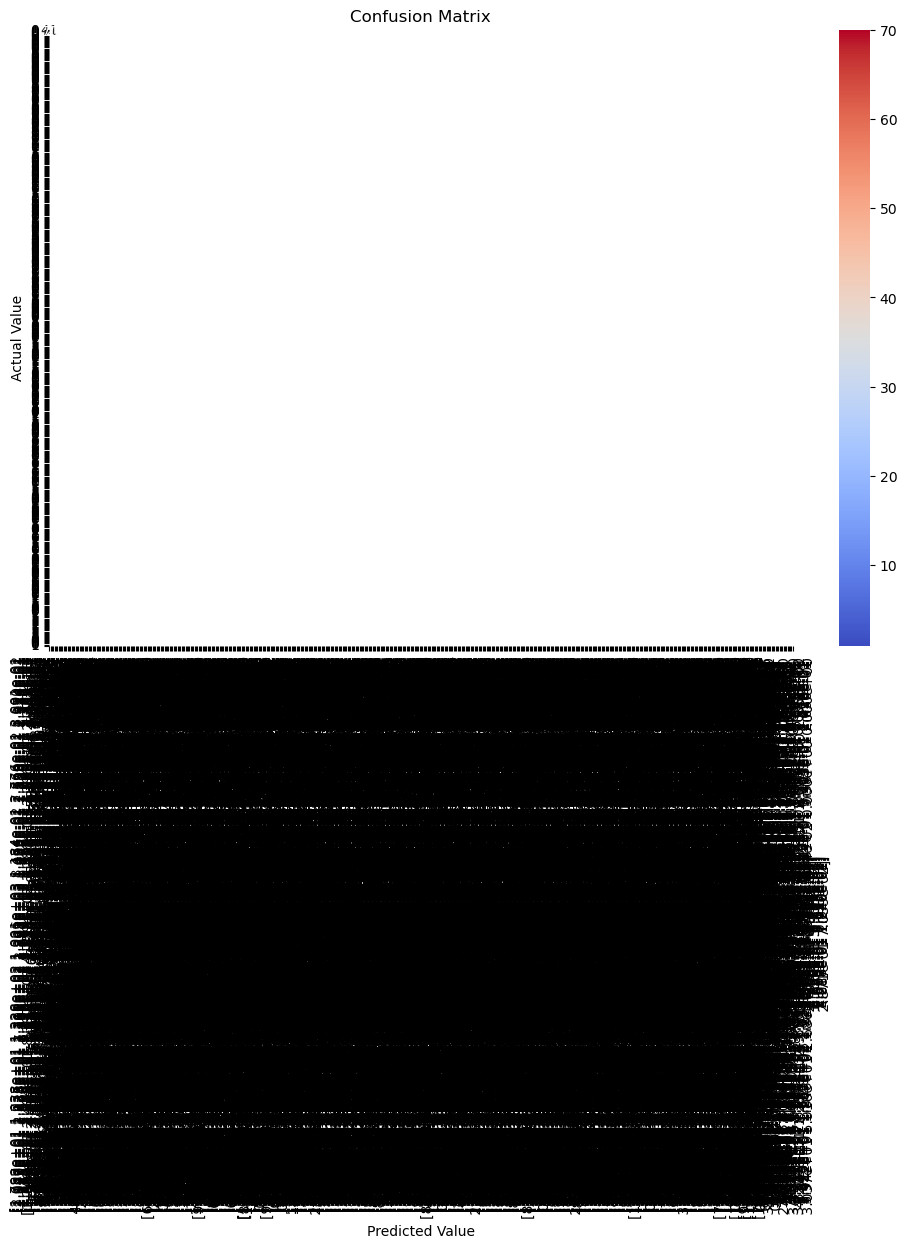

In [49]:
cm = confusion_matrix(y_test, pred)
plt.figure(figsize = (12,8))
sns.heatmap(cm, xticklabels = breast_cancer.data, yticklabels = breast_cancer.target, annot = True, cmap = 'coolwarm')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Value")
plt.ylabel("Actual Value")
plt.show()